In [1]:
import gzip
import pickle
import scipy
import numpy as np
import pandas as pd

from scipy import optimize
import matplotlib.pyplot as plt
import matrnn_distributional as dist

In [2]:
plt.rcParams['font.size'] = 8
plt.rcParams["font.family"] = "serif"

In [3]:
jobid = 'sqrnn'
d, w = 2, 64

In [4]:
finalstate_fname = 'finalstate_jobid' + str(jobid) + '_d' + str(d) + 'w' + str(w) + '.pkl'

In [5]:
finalstate = pickle.load(gzip.open(finalstate_fname, 'rb'))

In [6]:
tte = finalstate.flatten()
tte

array([173.88591 , 158.46005 , 101.978294, 116.849174, 121.50247 ,
       116.227104,  76.71837 ,  71.19294 , 155.3513  ,  67.05382 ,
       133.34024 ,  66.24412 ,  66.77518 , 159.76836 , 140.80754 ,
       115.48206 ,  72.745575,  96.09178 ,  97.22381 ,  66.805084,
        84.339   , 165.58875 , 103.44182 ,  67.13239 , 159.5862  ,
       142.77936 ,  90.11202 ,  76.03866 ,  70.611694,  84.499725,
        66.357185,  86.51841 , 158.36197 ,  66.27362 ,  66.288635,
        98.59543 , 106.30656 , 101.43535 , 169.18198 ,  90.67329 ,
       103.66347 ,  74.24755 ,  69.04653 , 155.6398  ,  77.592735,
        82.139114, 140.3778  , 137.35977 ,  65.84852 , 142.16267 ,
        85.51346 ,  67.022964,  71.555824, 110.581474, 115.09232 ,
        86.41121 ,  73.85741 ,  68.095764, 127.89872 ,  81.94983 ,
        73.62844 ,  66.02168 ,  75.758286,  69.45886 , 145.58946 ,
        78.76377 , 143.92361 ,  66.64978 , 155.88802 ,  79.65892 ,
       147.17337 ,  98.82245 , 115.52721 ,  91.38462 , 130.797

In [7]:
mtest = pickle.load(gzip.open('mlocaltest.pkl', 'rb'))

In [8]:
def split(m):
    nobs, nseq, nvar = m.shape
    
    # indices at [1,2] are tte, unc 
    x = m[:, :, np.delete(np.arange(nvar), [1,2])]
    y = m[:, :, :4].reshape((nobs, nseq, 1, 4))
    y[y<0] = 0
    return x, y

In [9]:
xtest, ytest = split(mtest)

## Load RUL

In [10]:
rul = pickle.load(gzip.open('rul.pkl', 'rb'))

## Density vs True RUL

In [11]:
dfall = pd.DataFrame({'tte': tte,
                      'rul': rul})

In [12]:
dfall = dfall.sort_values('rul')
dfall = dfall.reset_index()

In [13]:
print (dfall.head(5))

   index  rul        tte
0     33  7.0  66.273621
1     67  8.0  66.649780
2     30  8.0  66.357185
3     80  8.0  66.122391
4     81  9.0  70.566628


In [14]:
xvals = dfall['rul']

## Loss Function

In [15]:
def lossfn(d):
    a1, a2 = 13, 10
    return (np.exp(-d/a1)-1)*(d<0)+(np.exp(d/a2)-1)*(d>0)

## RUL-Est vs Actual

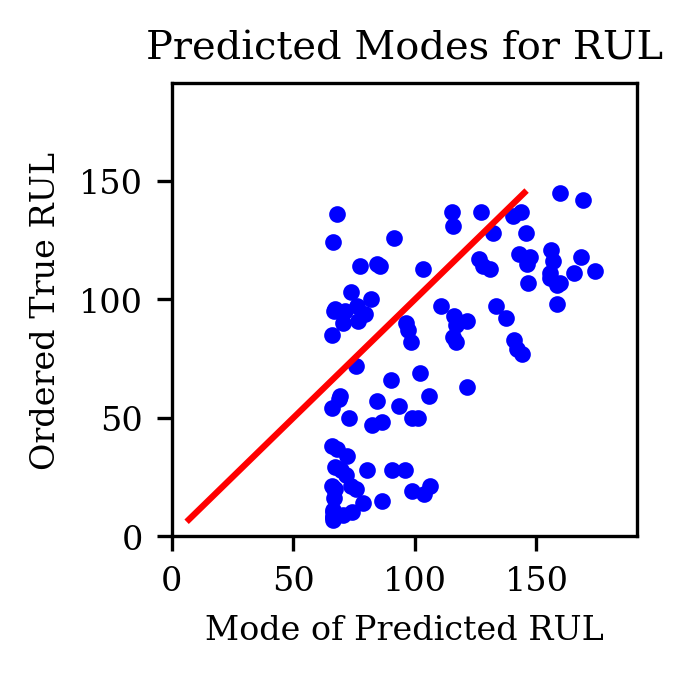

In [16]:
metric = tte

plt.figure(figsize = (2, 2), dpi = 300)
plt.scatter(metric, rul, 
            marker = '.', color = 'b')
xmax = max(metric)
ymax = max(rul)
pltmax = 1.1*max(xmax, ymax)
plt.plot(dfall['rul'], dfall['rul'], color = 'red')

plt.title('Predicted Modes for RUL')
plt.xlabel('Mode of Predicted RUL')
plt.ylabel('Ordered True RUL')
plt.xlim(0, pltmax)
plt.ylim(0, pltmax)

plt.show()

In [17]:
min(tte - rul), max(tte - rul)

(-67.8813247680664, 85.66346740722656)

In [18]:
q = [0, 25, 50, 75, 100]
np.percentile(tte - rul, q)

array([-67.88132477,   8.64243126,  33.91373444,  52.42858696,
        85.66346741])

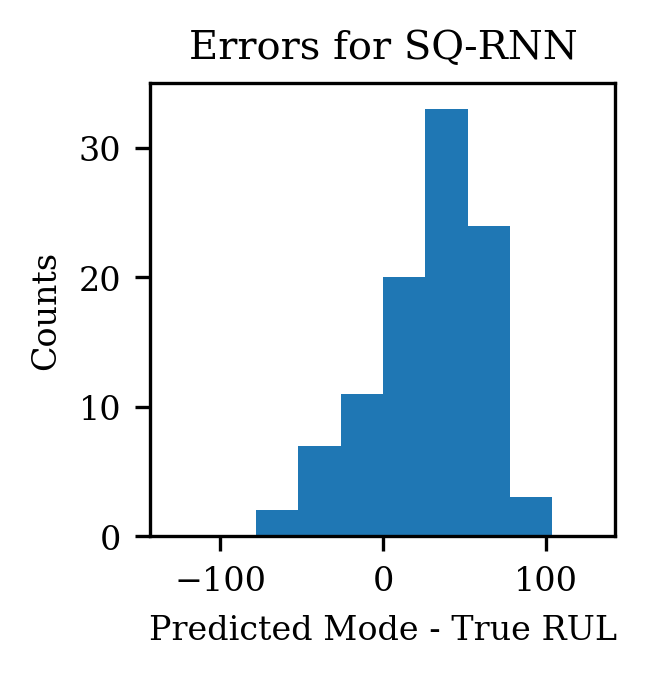

In [19]:
plt.figure(figsize = (2, 2), dpi = 300)
plt.hist(tte - rul, range = (-130, 130))
plt.ylim((0, 35))
plt.title('Errors for SQ-RNN')
plt.xlabel('Predicted Mode - True RUL')
plt.ylabel('Counts')
plt.show()

In [20]:
mloss = np.average(lossfn(tte - rul))
print ('mloss:', mloss)

mloss: 262.3953725622521


In [21]:
mse = np.average(np.power(tte - rul, 2))
print ('mse:', mse)

mse: 1806.263545143712


In [22]:
rmse = np.sqrt(mse)
print ('rmse:', rmse)

rmse: 42.50015935433316
